In [ ]:
import numpy
from matplotlib import pyplot
from DlibEvaluater.HeadPoseEstimator import HeadPoseEstimator
from DatasetHandler.BiwiBrowser import readBIWIDataset, BIWI_Subject_IDs, now, label_rescaling_factor, BIWI_Lebel_Scalers, unscaleAnnoByScalers

In [46]:
num_outputs = 3
angles = ['Pitch', 'Yaw', 'Roll']
def evaluate_subject(predictions, labels):
    sclrs = [BIWI_Lebel_Scalers[0][3:6], BIWI_Lebel_Scalers[1][3:6]]
    labels = unscaleAnnoByScalers(labels, sclrs)
    outputs = []
    for i in range(num_outputs):
        differences = (labels[:, i:i+1] - predictions[:, i:i+1])
        absolute_mean_error = numpy.abs(differences).mean()
        outputs.append(absolute_mean_error)
        print("\tThe absolute mean error on %s angle estimation: %.2f Degree" % (angles[i], absolute_mean_error))
    total = 0
    for avg in outputs: total += avg
    outputs.append(total/num_outputs)
    print("\tThe absolute mean error on average: %.2f Degree" % (outputs[-1]))
    return outputs

In [43]:
trainingBiwi = readBIWIDataset(subjectList = [i for i in range(1, 25)])

All frames and annotations from 24 datasets have been read by 2019-04-13 16:54:04.503212


In [44]:
subject = 1
results = []
for inputMatrix, labels in trainingBiwi:
    print('For the Subject %d (%s):' % (subject, BIWI_Subject_IDs[subject]))
    labels = labels[:, 3:]
    hpe = HeadPoseEstimator()
    predictions = numpy.zeros_like(labels)
    for i in range(inputMatrix.shape[0]): 
        predictions[i] = hpe.get_head_pose_in_euler_angle(inputMatrix[i]).reshape((3,))
    outputs = evaluate_subject(predictions, labels)
    results.append(outputs)
    subject += 1

For the Subject 1 (F01):
	The absolute mean error on Pitch angle estimation: 14.67 Degree
	The absolute mean error on Yaw angle estimation: 13.76 Degree
	The absolute mean error on Roll angle estimation: 4.78 Degree
	The absolute mean error on average: 11.07 Degree
For the Subject 2 (F02):
	The absolute mean error on Pitch angle estimation: 12.23 Degree
	The absolute mean error on Yaw angle estimation: 15.92 Degree
	The absolute mean error on Roll angle estimation: 3.21 Degree
	The absolute mean error on average: 10.45 Degree
For the Subject 3 (F03):
	The absolute mean error on Pitch angle estimation: 7.55 Degree
	The absolute mean error on Yaw angle estimation: 11.28 Degree
	The absolute mean error on Roll angle estimation: 15.03 Degree
	The absolute mean error on average: 11.29 Degree
For the Subject 4 (F04):
	The absolute mean error on Pitch angle estimation: 10.76 Degree
	The absolute mean error on Yaw angle estimation: 11.51 Degree
	The absolute mean error on Roll angle estimation

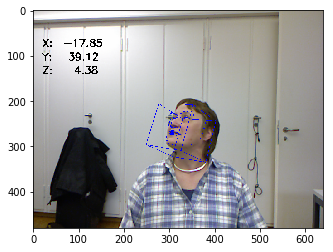

In [21]:
f = hpe.get_frame_with_annotations(inputMatrix[34].astype(numpy.uint8))
pyplot.imshow(f)